In [72]:
import os
from glob import glob
from tqdm import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [64]:
train_paths = glob('data/cifar/train/*.png')
test_paths = glob('data/cifar/test/*.png')

In [23]:
len(train_paths), len(test_paths)

(50000, 10000)

In [24]:
path = train_paths[0]
path

'data/cifar/train/32270_deer.png'

In [25]:
def get_labels(path):
    label = path.split('_')[1].split('.png')[0]
    return label

In [26]:
get_labels(path)

'deer'

In [49]:
train_names = []
for path in train_paths:
    label = get_labels(path)
    train_names.append(label)

In [50]:
len(train_names)

50000

In [51]:
train_names

['deer',
 'cat',
 'deer',
 'truck',
 'automobile',
 'bird',
 'horse',
 'frog',
 'ship',
 'ship',
 'dog',
 'dog',
 'horse',
 'cat',
 'dog',
 'deer',
 'deer',
 'horse',
 'frog',
 'deer',
 'dog',
 'ship',
 'automobile',
 'ship',
 'bird',
 'frog',
 'automobile',
 'ship',
 'automobile',
 'cat',
 'airplane',
 'ship',
 'horse',
 'ship',
 'automobile',
 'horse',
 'bird',
 'bird',
 'airplane',
 'truck',
 'frog',
 'airplane',
 'truck',
 'automobile',
 'bird',
 'horse',
 'automobile',
 'ship',
 'cat',
 'cat',
 'bird',
 'truck',
 'bird',
 'deer',
 'airplane',
 'dog',
 'truck',
 'dog',
 'ship',
 'automobile',
 'bird',
 'truck',
 'airplane',
 'bird',
 'airplane',
 'deer',
 'airplane',
 'frog',
 'bird',
 'ship',
 'bird',
 'ship',
 'truck',
 'airplane',
 'bird',
 'automobile',
 'horse',
 'ship',
 'cat',
 'cat',
 'bird',
 'airplane',
 'dog',
 'dog',
 'frog',
 'ship',
 'cat',
 'truck',
 'truck',
 'ship',
 'dog',
 'deer',
 'cat',
 'bird',
 'ship',
 'horse',
 'automobile',
 'bird',
 'deer',
 'frog',
 'dee

In [30]:
classes_name[0]

'deer'

In [52]:
np.unique(train_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [53]:
uniq = np.unique(train_names, return_counts=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

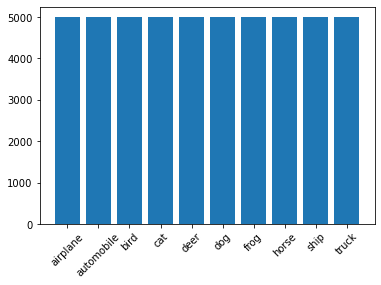

In [54]:
plt.bar(uniq[0],uniq[1])
plt.xticks(rotation=45)

In [55]:
train_data = {'name':train_paths, 'class':train_names}
train_df = pd.DataFrame(train_data)
train_df

,name,class
0,data/cifar/train/32270_deer.png,deer
1,data/cifar/train/21851_cat.png,cat
2,data/cifar/train/48309_deer.png,deer
3,data/cifar/train/33547_truck.png,truck
4,data/cifar/train/45202_automobile.png,automobile
...,...,...
49995,data/cifar/train/24599_horse.png,horse
49996,data/cifar/train/38514_automobile.png,automobile
49997,data/cifar/train/20054_deer.png,deer
49998,data/cifar/train/25602_bird.png,bird


In [56]:
test_names = []
for path in test_paths:
    label = get_labels(path)
    test_names.append(label)
    
test_data = {'name':test_paths, 'class':test_names}
test_df = pd.DataFrame(test_data)
test_df

,name,class
0,data/cifar/test/2598_cat.png,cat
1,data/cifar/test/7195_horse.png,horse
2,data/cifar/test/6171_deer.png,deer
3,data/cifar/test/2586_horse.png,horse
4,data/cifar/test/8372_automobile.png,automobile
...,...,...
9995,data/cifar/test/4882_frog.png,frog
9996,data/cifar/test/5838_deer.png,deer
9997,data/cifar/test/2568_truck.png,truck
9998,data/cifar/test/5238_bird.png,bird


In [57]:
train_df.head()

,name,class
0,data/cifar/train/32270_deer.png,deer
1,data/cifar/train/21851_cat.png,cat
2,data/cifar/train/48309_deer.png,deer
3,data/cifar/train/33547_truck.png,truck
4,data/cifar/train/45202_automobile.png,automobile


In [58]:
train_csv = 'train_df.csv'
test_csv = 'test_df.csv'

In [59]:
train_df.to_csv(train_csv,index=False)
test_df.to_csv(test_csv,index=False)

In [60]:
# dataframe을 이용해 학습하기

In [61]:
# hyperparametor

eppchs = 10
batch_size =32

learning_rate = 0.001
dropout_rate = 0.7

input_shape = (28,28,1)
num_classes = 10

In [66]:
#preprocessing

train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

In [67]:
train_df.head()

,name,class
0,data/cifar/train/32270_deer.png,deer
1,data/cifar/train/21851_cat.png,cat
2,data/cifar/train/48309_deer.png,deer
3,data/cifar/train/33547_truck.png,truck
4,data/cifar/train/45202_automobile.png,automobile


In [68]:
test_df.head()

,name,class
0,data/cifar/test/2598_cat.png,cat
1,data/cifar/test/7195_horse.png,horse
2,data/cifar/test/6171_deer.png,deer
3,data/cifar/test/2586_horse.png,horse
4,data/cifar/test/8372_automobile.png,automobile


In [116]:
#generator 만들기

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.3, 
    zoom_range=0.2, 
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [117]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col = 'name',
    y_col = 'class',
    target_size = input_shape[:2],
    batch_size = batch_size
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col = 'name',
    y_col = 'class',
    target_size = input_shape[:2],
    batch_size = batch_size
)

Found 50000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.


In [118]:
inputs = layers.Input(shape=input_shape)

# feature extration
net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#fully connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='CNN')

In [119]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

In [122]:
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=1,
        validation_data=test_generator,
        validation_steps=len(test_generator))

UnimplementedError:  Fused conv implementation does not support grouped convolutions for now.
	 [[node CNN/activation_36/Relu (defined at <ipython-input-122-f65254ab2f33>:1) ]] [Op:__inference_train_function_7298]

Function call stack:
train_function
